# 5.3 Plotting Categorical Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
sns.set_style("white")
market_df = pd.read_csv("Global_Sales/market_fact.csv") 
customer_df = pd.read_csv("Global_Sales/cust_dimen.csv")
product_df = pd.read_csv("Global_Sales/prod_dimen.csv")
shipping_df = pd.read_csv("Global_Sales/shipping_dimen.csv")
orders_df = pd.read_csv("Global_Sales/orders_dimen.csv")

In [12]:
market_df.head()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56
1,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.27,0.01,13,4.56,0.93,0.54
2,Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.69,0.00,26,1148.90,2.50,0.59
3,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.89,0.09,43,729.34,14.30,0.37
4,Ord_5485,Prod_17,SHP_7664,Cust_1818,4233.15,0.08,35,1219.87,26.30,0.38


In [13]:
product_df.head()

,Product_Category,Product_Sub_Category,Prod_id
0,OFFICE SUPPLIES,STORAGE & ORGANIZATION,Prod_1
1,OFFICE SUPPLIES,APPLIANCES,Prod_2
2,OFFICE SUPPLIES,BINDERS AND BINDER ACCESSORIES,Prod_3
3,TECHNOLOGY,TELEPHONES AND COMMUNICATION,Prod_4
4,FURNITURE,OFFICE FURNISHINGS,Prod_5


## 5.3.1 Box Plot

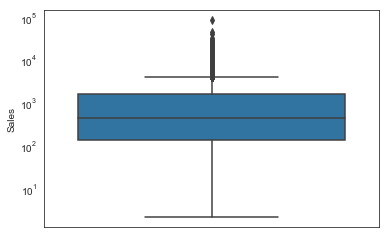

In [6]:
sns.boxplot(y = market_df['Sales'])
plt.yscale("log")
plt.show()

In [15]:
df = pd.merge(market_df, product_df, how="inner", on="Prod_id")
df.head()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin,Product_Category,Product_Sub_Category
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
1,Ord_2978,Prod_16,SHP_4112,Cust_1088,305.05,0.04,27,23.12,3.37,0.57,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
2,Ord_5484,Prod_16,SHP_7663,Cust_1820,322.82,0.05,35,-17.58,3.98,0.56,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
3,Ord_3730,Prod_16,SHP_5175,Cust_1314,459.08,0.04,34,61.57,3.14,0.60,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
4,Ord_4143,Prod_16,SHP_5771,Cust_1417,207.21,0.06,24,-78.64,6.14,0.59,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"


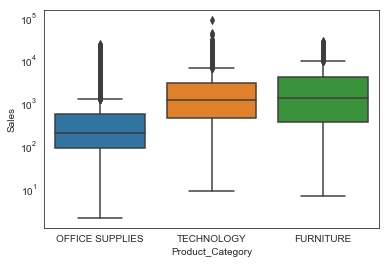

In [19]:
# Boxplot for various product categories and Sales
sns.boxplot(x="Product_Category", y="Sales", data=df)
plt.yscale("log")
plt.show()

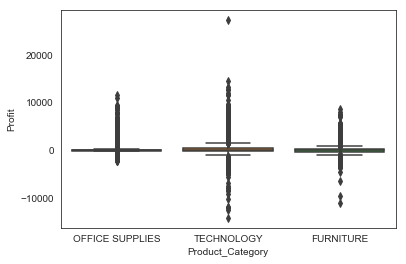

In [21]:
# Boxplot for various product categories and Profit
sns.boxplot(x="Product_Category", y="Profit", data=df)
plt.show()

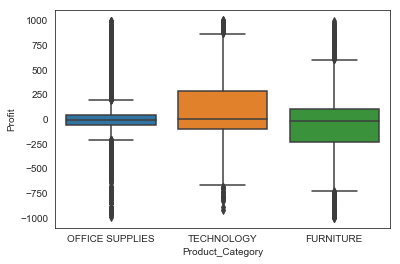

In [24]:
# Profit has some outliers due to which boxplots are unreadable.
# Remove extreme values from DF for visualization and plot

df1 = df[(df.Profit < 1000) & (df.Profit > -1000)]
sns.boxplot(x="Product_Category", y="Profit", data=df1)
plt.show()

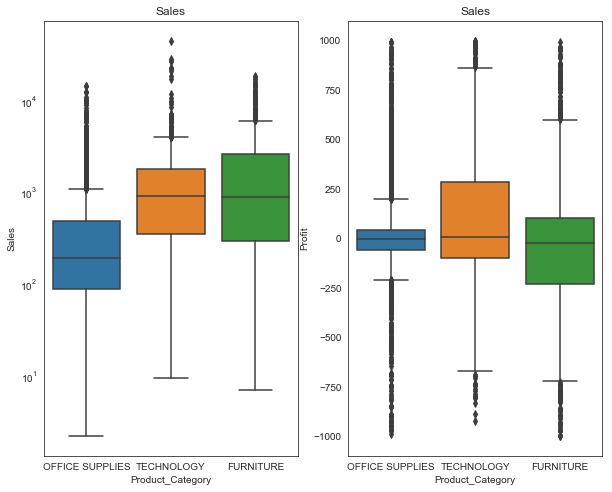

In [26]:
# PLot Sales and profit plots side by side
plt.figure(figsize=(10,8))

#subplot 1 - Sales
plt.subplot(1,2,1)
sns.boxplot(x="Product_Category", y="Sales", data=df1)
plt.title("Sales")
plt.yscale("log")

#subplot 2- Profit
plt.subplot(1,2,2)
sns.boxplot(x="Product_Category", y="Profit", data=df1)
plt.title("Sales")

plt.show()


In [30]:
customer_df.head()
df2 = pd.merge(df1, customer_df, how="inner", on="Cust_id")
df2.head()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin,Product_Category,Product_Sub_Category,Customer_Name,Province,Region,Customer_Segment
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS",AARON BERGMAN,ALBERTA,WEST,CORPORATE
1,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.27,0.01,13,4.56,0.93,0.54,OFFICE SUPPLIES,PENS & ART SUPPLIES,AARON BERGMAN,ALBERTA,WEST,CORPORATE
2,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.89,0.09,43,729.34,14.30,0.37,OFFICE SUPPLIES,PAPER,AARON BERGMAN,ALBERTA,WEST,CORPORATE
3,Ord_5446,Prod_6,SHP_7608,Cust_1818,164.02,0.03,23,-47.64,6.15,0.37,OFFICE SUPPLIES,PAPER,AARON BERGMAN,ALBERTA,WEST,CORPORATE
4,Ord_2978,Prod_16,SHP_4112,Cust_1088,305.05,0.04,27,23.12,3.37,0.57,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS",AARON HAWKINS,ONTARIO,ONTARIO,HOME OFFICE


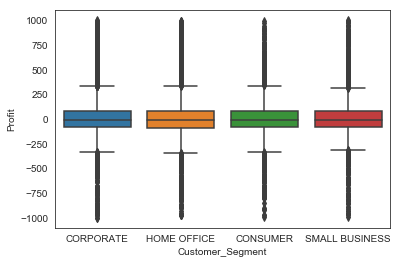

In [33]:
#Profit for Customer Segment
sns.boxplot(x="Customer_Segment", y="Profit", data=df2)



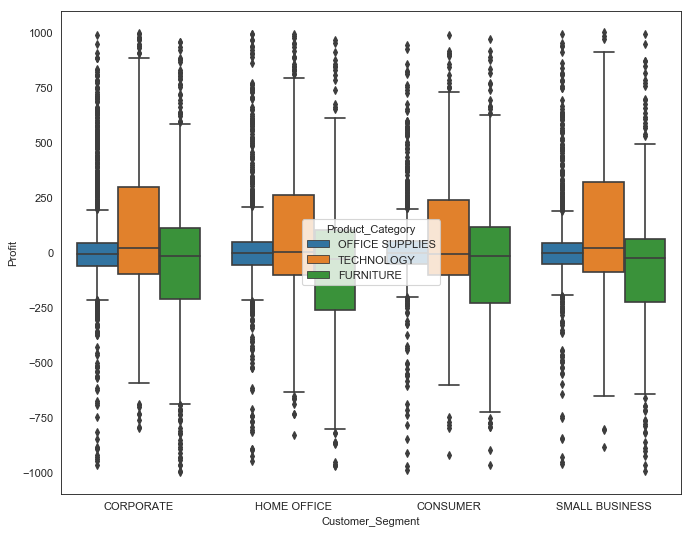

In [35]:
plt.figure(num=None, figsize=(10,8), dpi=80, facecolor='w', edgecolor='k')

#specify categorical variable
sns.boxplot(x="Customer_Segment", y="Profit", hue='Product_Category', data=df2)
plt.show()

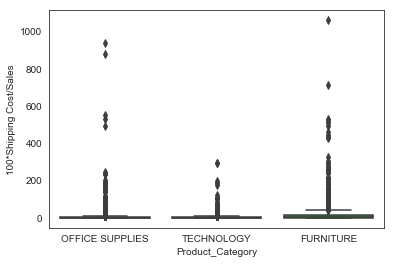

In [40]:
# plot shipping cost as percentable of sales amount
sns.boxplot(x=df2["Product_Category"], y=100 * df2['Shipping_Cost']/df['Sales'])
plt.ylabel("100*Shipping Cost/Sales")
plt.show()

## 5.3.2 Bar Plot

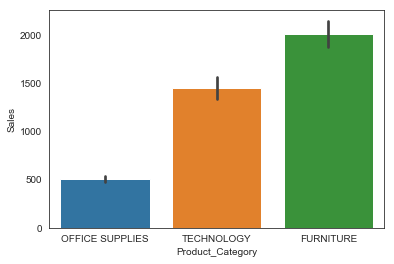

In [42]:
#Barplot with default statistic - Mean
sns.barplot(x="Product_Category", y="Sales", data=df2)
plt.show()

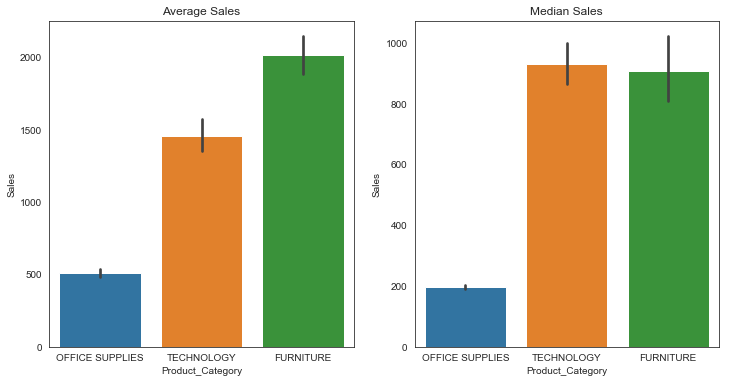

In [45]:
# 2 subplots for mean and median resp.
plt.figure(figsize=(12,6))

#subplot 1 : Statistic mean
plt.subplot(1,2,1)
sns.barplot(x="Product_Category", y="Sales", data=df2)
plt.title("Average Sales")

plt.subplot(1,2,2)
sns.barplot(x="Product_Category", y="Sales", data=df2, estimator=np.median)
plt.title("Median Sales")

plt.show()


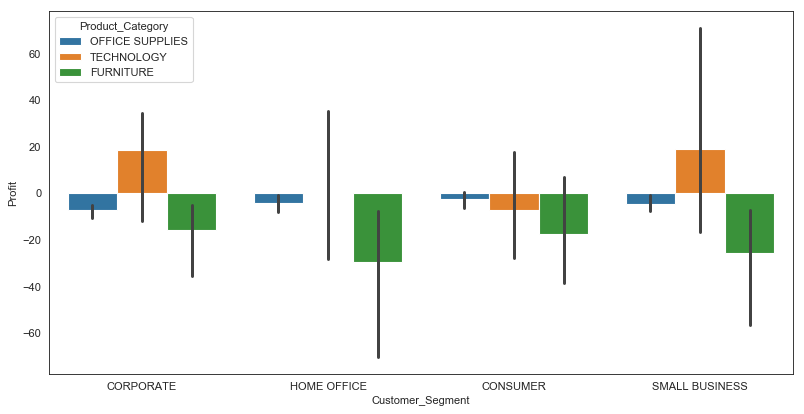

In [46]:
# Another categorical variable in barplot
plt.figure(figsize=(12,6), num=None, dpi=80, facecolor='w', edgecolor='k')

sns.barplot(x="Customer_Segment", y="Profit", hue="Product_Category", data=df2, estimator=np.median)
plt.show()

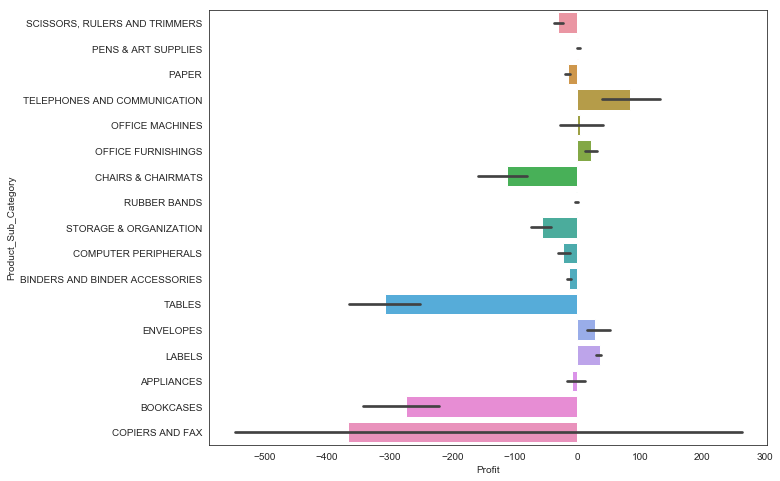

In [47]:
plt.figure(figsize=(10,8))
sns.barplot(x="Profit", y="Product_Sub_Category", data=df2, estimator=np.median)
plt.show()

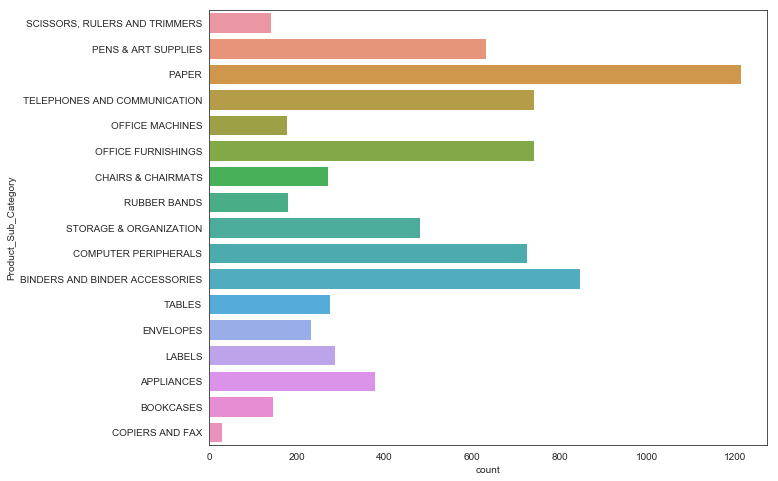

In [50]:
#Plotting counts for a category  using countplot
plt.figure(figsize=(10,8))
sns.countplot(y="Product_Sub_Category", data=df2)
plt.show()


## 5.3.3 Time Series Data

### Visualising simple time series data

In [52]:
#merge market dataframe with order dataframe

df3 = pd.merge(market_df, orders_df, how="inner", on="Ord_id")
df3.head()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin,Order_ID,Order_Date,Order_Priority
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56,36262,27-07-2010,NOT SPECIFIED
1,Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.69,0.00,26,1148.90,2.50,0.59,36262,27-07-2010,NOT SPECIFIED
2,Ord_5446,Prod_6,SHP_7608,Cust_1818,164.02,0.03,23,-47.64,6.15,0.37,36262,27-07-2010,NOT SPECIFIED
3,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.27,0.01,13,4.56,0.93,0.54,20513,07-07-2009,HIGH
4,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.89,0.09,43,729.34,14.30,0.37,39682,09-11-2010,MEDIUM


In [53]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8399 entries, 0 to 8398
Data columns (total 13 columns):
Ord_id                 8399 non-null object
Prod_id                8399 non-null object
Ship_id                8399 non-null object
Cust_id                8399 non-null object
Sales                  8399 non-null float64
Discount               8399 non-null float64
Order_Quantity         8399 non-null int64
Profit                 8399 non-null float64
Shipping_Cost          8399 non-null float64
Product_Base_Margin    8336 non-null float64
Order_ID               8399 non-null int64
Order_Date             8399 non-null object
Order_Priority         8399 non-null object
dtypes: float64(5), int64(2), object(6)
memory usage: 918.6+ KB


In [55]:
# In this info, Order_Date is of object type. we need to convert it into  Datetime 

df3["Order_Date"] = pd.to_datetime(df3["Order_Date"])

df3.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8399 entries, 0 to 8398
Data columns (total 14 columns):
Ord_id                 8399 non-null object
Prod_id                8399 non-null object
Ship_id                8399 non-null object
Cust_id                8399 non-null object
Sales                  8399 non-null float64
Discount               8399 non-null float64
Order_Quantity         8399 non-null int64
Profit                 8399 non-null float64
Shipping_Cost          8399 non-null float64
Product_Base_Margin    8336 non-null float64
Order_ID               8399 non-null int64
Order_Date             8399 non-null datetime64[ns]
Order_Priority         8399 non-null object
Order_Date             8399 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(5), int64(2), object(5)
memory usage: 984.3+ KB


In [57]:
#Since on each day, multiple orders can be placed, we need to aggregate Sales using  metric such as mean, median etc.

#WE will groupby Order_Date  and sum sales 

timedf = df3.groupby('Order_Date')['Sales'].sum()
print(timedf.head())

print(type(timedf))


Order_Date
2009-01-01    1052.8400
2009-01-02    5031.9000
2009-01-03    7288.1375
2009-01-04    6188.4245
2009-01-05    2583.3300
Name: Sales, dtype: float64
<class 'pandas.core.series.Series'>


C:\Apps\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


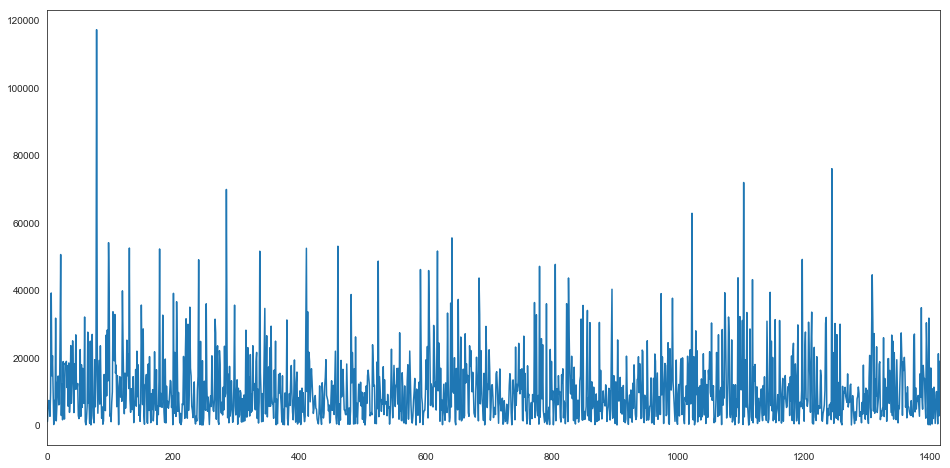

In [59]:
# this df can be plotted using  tsplot for time series plot
plt.figure(figsize=(16,8))

sns.tsplot(data=timedf)
plt.show()

### Using Derived Date Metrics for Visualisation

In [61]:
#extract month and year from date 

df3['month'] = df3['Order_Date'].dt.month
df3['year'] = df3['Order_Date'].dt.year
df3.head()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin,Order_ID,Order_Date,Order_Priority,Order_Date,month,year
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56,36262,2010-07-27,NOT SPECIFIED,2010-07-27,7,2010
1,Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.69,0.00,26,1148.90,2.50,0.59,36262,2010-07-27,NOT SPECIFIED,2010-07-27,7,2010
2,Ord_5446,Prod_6,SHP_7608,Cust_1818,164.02,0.03,23,-47.64,6.15,0.37,36262,2010-07-27,NOT SPECIFIED,2010-07-27,7,2010
3,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.27,0.01,13,4.56,0.93,0.54,20513,2009-07-07,HIGH,2009-07-07,7,2009
4,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.89,0.09,43,729.34,14.30,0.37,39682,2010-09-11,MEDIUM,2010-09-11,9,2010


In [64]:
# Groupby year, month
df_yrmn = df3.groupby(["year", 'month']).Sales.mean()
#df_yrmn = df3.groupby(["year", 'month'])['Sales'].mean()  #alternate way 
df_yrmn.head()

year  month
2009  1        1898.475090
      2        2116.510723
      3        2258.661599
      4        2374.155868
      5        1922.317055
Name: Sales, dtype: float64

C:\Apps\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


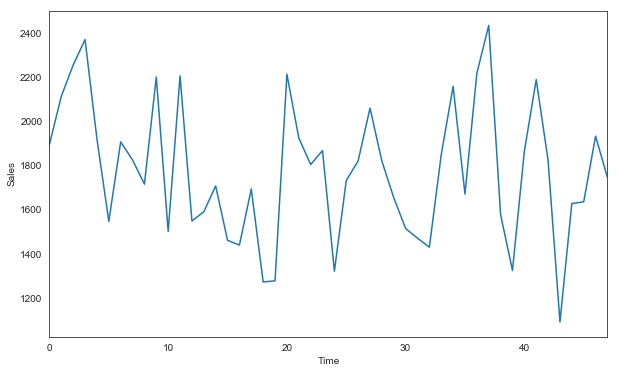

In [67]:
#Time series for year, month wise
plt.figure(figsize=(10,6))
sns.tsplot(df_yrmn)
plt.xlabel("Time")
plt.ylabel("Sales")
plt.show()

In [69]:
# Create pivot table using month. This will give monthwise mean of all sales
PvTBL = pd.pivot_table(df3, values='Sales', index='year', columns='month', aggfunc='mean')
PvTBL.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2009,1898.475090,2116.510723,2258.661599,2374.155868,1922.317055,1548.093259,1909.084469,1827.095921,1717.295494,2203.961070,1502.192743,2209.047484
2010,1549.664361,1591.532297,1708.934944,1461.935539,1440.393540,1695.397085,1272.653408,1277.917503,2216.599136,1927.250907,1806.324648,1869.720956
2011,1321.671562,1733.378070,1822.860614,2062.716921,1822.033936,1655.599644,1515.576260,1471.700741,1430.616748,1851.404564,2161.479056,1672.187881
2012,2220.831551,2438.166961,1578.284028,1325.253694,1865.744629,2192.228263,1824.935942,1090.950643,1628.963780,1636.951775,1935.183039,1747.047528


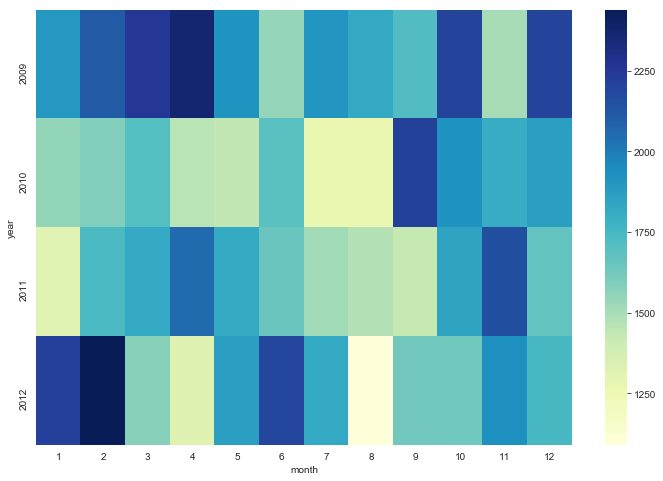

In [70]:
# Create heatmap from this table
plt.figure(figsize=(12,8))
sns.heatmap(PvTBL, cmap='YlGnBu')
plt.show()